# 02807 Computational Tools for Data Science Group Project

## Importing the data

In [10]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Read CSV files from 'data' directory
csv_files = glob.glob(os.path.join("data", "*.csv"))

In [5]:
# Generate Pandas DataFrames from CSV files
df_all = [pd.read_csv(file) for file in csv_files]

In [6]:
# Concatenate DataFrames
df = pd.concat(df_all, ignore_index=True)

## Cleaning the data

In [6]:
# Inspect data
df.head()

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,tail_number,departure_delay,arrival_delay,delay_carrier,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,2019-05-01,215,N615AS,-8,-16,0,...,0.0,29.59,10.0,8.0,7.027253e+10,42.0,0.0,30.16,10.0,3.0
1,F9,402,LAX,DEN,2019-05-01,147,N701FR,17,-4,0,...,0.0,29.65,10.0,3.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0
2,F9,662,SFO,DEN,2019-05-01,158,N346FR,44,27,0,...,0.0,29.98,10.0,6.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0
3,F9,790,PDX,DEN,2019-05-01,156,N332FR,24,10,0,...,0.0,29.98,10.0,0.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0
4,AS,108,ANC,SEA,2019-05-01,210,N548AS,-9,-31,0,...,0.0,30.18,10.0,5.0,7.279302e+10,44.0,0.0,29.58,10.0,7.0


In [7]:
# Inspect data types and missing values
pd.DataFrame({'Data Type': df.dtypes, 'Missing Values': df.isnull().sum(), 'Percentage Missing Values': round((df.isnull().sum() / len(df)) * 100, 2)})

,Data Type,Missing Values,Percentage Missing Values
carrier_code,object,0,0.00
flight_number,int64,0,0.00
origin_airport,object,0,0.00
destination_airport,object,0,0.00
date,object,0,0.00
scheduled_elapsed_time,int64,0,0.00
tail_number,object,13556,0.25
departure_delay,int64,0,0.00
arrival_delay,int64,0,0.00
delay_carrier,int64,0,0.00


### Missing values

In [8]:
# Drop 'tail_number' column (due to missing values and insignificance)
df = df.drop(['tail_number'], axis=1)

In [9]:
# Drop rows with any missing values across all columns other than the departure and arrival columns (cancelled flights)
df = df.dropna(subset=df.columns.difference(['actual_departure_dt', 'actual_arrival_dt']))

### Data types

In [10]:
# Convert date columns to datetime format
date_columns = ['date', 'scheduled_departure_dt', 'scheduled_arrival_dt', 'actual_departure_dt', 'actual_arrival_dt']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [11]:
# Inspect adjusted data types and missing values
pd.DataFrame({'Data Type': df.dtypes, 'Missing Values': df.isnull().sum(), 'Percentage Missing Values': round((df.isnull().sum() / len(df)) * 100, 2)})

,Data Type,Missing Values,Percentage Missing Values
carrier_code,object,0,0.0
flight_number,int64,0,0.0
origin_airport,object,0,0.0
destination_airport,object,0,0.0
date,datetime64[ns],0,0.0
scheduled_elapsed_time,int64,0,0.0
departure_delay,int64,0,0.0
arrival_delay,int64,0,0.0
delay_carrier,int64,0,0.0
delay_weather,int64,0,0.0


### Feature engineering

In [13]:
# Function to categorise delay times
def categorise_delay(delay):
    if delay <= 15:          # Minor delay
        return 0
    elif 0 < delay <= 60:    # Moderate delay
        return 1
    elif 30 < delay <= 120:  # Significant delay
        return 2
    else:                    # Severe delay
        return 3

In [14]:
# Add categorised delay time features to data
df['departure_delay_category'] = df['departure_delay'].apply(categorise_delay)
df['arrival_delay_category'] = df['arrival_delay'].apply(categorise_delay)

In [15]:
# Inspect updated data
df.head()

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,...,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y,departure_delay_category,arrival_delay_category
0,AS,121,SEA,ANC,2019-05-01,215,-8,-16,0,0,...,10.0,8.0,7.027253e+10,42.0,0.0,30.16,10.0,3.0,0,0
1,F9,402,LAX,DEN,2019-05-01,147,17,-4,0,0,...,10.0,3.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0,1,0
2,F9,662,SFO,DEN,2019-05-01,158,44,27,0,0,...,10.0,6.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0,1,1
3,F9,790,PDX,DEN,2019-05-01,156,24,10,0,0,...,10.0,0.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0,1,0
4,AS,108,ANC,SEA,2019-05-01,210,-9,-31,0,0,...,10.0,5.0,7.279302e+10,44.0,0.0,29.58,10.0,7.0,0,0


In [16]:

# Function to categorise weather conditions relative to historical weather conditions AT LOCATION
def categorise_weather(df, weather_col, station_col):
    station_stats = df.groupby(station_col)[weather_col].agg(['mean', 'std']).reset_index()
    
    df = df.merge(station_stats, on=station_col, how='left', suffixes=('', '_stats'))
    
    conditions = [
        (df[weather_col] < df['mean'] - df['std']),  # Much Lower than average
        (df[weather_col] < df['mean']),              # Lower than average
        (df[weather_col] < df['mean'] + df['std']),  # Higher than average
        (df[weather_col] >= df['mean'] + df['std'])  # Much Higher than average
    ]
    
    categories = [-2, -1, 1, 2]

    df[f'{weather_col}_category'] = np.select(conditions, categories, default='Average')
    
    df.drop(['mean', 'std'], axis=1, inplace=True)
    
    return df

In [17]:
# Add categorised weather condition features to data
station_columns = ['STATION_x', 'STATION_y']
weather_columns = ['HourlyDryBulbTemperature_x', 'HourlyPrecipitation_x', 'HourlyStationPressure_x', 'HourlyVisibility_x', 'HourlyWindSpeed_x', 'HourlyDryBulbTemperature_y', 'HourlyPrecipitation_y', 'HourlyStationPressure_y', 'HourlyVisibility_y', 'HourlyWindSpeed_y']

for station_col in station_columns:
    for weather_col in weather_columns:
        df = categorise_weather(df, weather_col, station_col)

In [ ]:
# Inspect updated data
df.head()

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,...,HourlyDryBulbTemperature_x_category,HourlyPrecipitation_x_category,HourlyStationPressure_x_category,HourlyVisibility_x_category,HourlyWindSpeed_x_category,HourlyDryBulbTemperature_y_category,HourlyPrecipitation_y_category,HourlyStationPressure_y_category,HourlyVisibility_y_category,HourlyWindSpeed_y_category
0,AS,121,SEA,ANC,2019-07-01,215,0,-16,0,0,...,1,-1,1,1,-1,1,-1,2,1,-1
1,F9,402,LAX,DEN,2019-07-01,143,-1,-7,0,0,...,-1,-1,1,1,-1,1,-1,1,1,-1
2,F9,790,PDX,DEN,2019-07-01,156,21,10,0,0,...,-1,-1,1,1,-1,1,-1,1,-1,1
3,F9,662,SFO,DEN,2019-07-01,158,106,84,0,0,...,-1,-1,1,1,1,1,-1,1,-1,1
4,AS,135,ORD,ANC,2019-07-01,400,-9,-4,0,0,...,1,-1,-1,1,-1,1,-1,2,1,-2


In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# To handle outliers in "departure_delay"
Q1 = df['departure_delay'].quantile(0.25)
Q3 = df['departure_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # Represents the range beyond which data points are outliers
upper_bound = Q3 + 1.5 * IQR
df['departure_delay'] = np.where((df['departure_delay'] < lower_bound) | (df['departure_delay'] > upper_bound), df['departure_delay'].median(), df['departure_delay'])

In [ ]:
print(df['departure_delay'])

0          -8.0
1          17.0
2          -2.0
3          -2.0
4          -9.0
           ... 
5512898    -5.0
5512899    -6.0
5512900    -5.0
5512901    -7.0
5512902   -10.0
Name: departure_delay, Length: 5512903, dtype: float64


In [ ]:
# Applying Min-Max scaling or Standardization (Z-score) to numerical columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Apply Min-Max scaling to numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols])

# Apply Standardization to numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols])

         flight_number  scheduled_elapsed_time  departure_delay  \
0             0.012767                0.216707         0.302326   
1             0.042664                0.175545         0.883721   
2             0.070327                0.182203         0.441860   
3             0.083945                0.180993         0.441860   
4             0.011384                0.213680         0.279070   
...                ...                     ...              ...   
5512898       0.126928                0.119855         0.372093   
5512899       0.142249                0.118039         0.348837   
5512900       0.149590                0.118039         0.372093   
5512901       0.253431                0.118644         0.325581   
5512902       0.114267                0.121671         0.255814   

         arrival_delay  delay_carrier  delay_weather  \
0             0.033624            0.0            0.0   
1             0.037504            0.0            0.0   
2             0.047527     

## Visualizations of flight delays over time

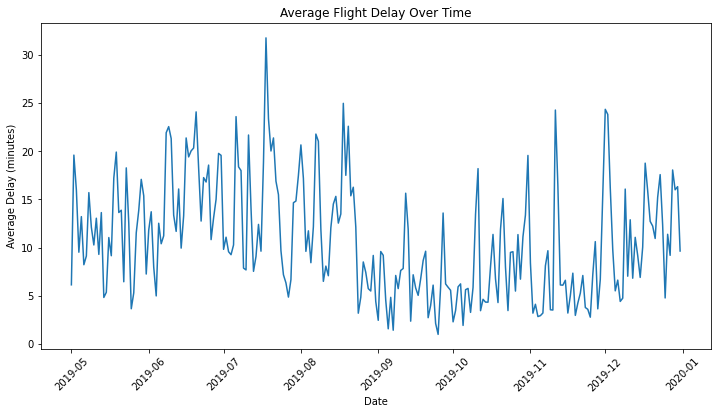

In [7]:
# Ensure your date column is in datetime format
df['date'] = pd.to_datetime(df['date'])  # Adjust column name as needed

# Group data by date and calculate mean delay
daily_delays = df.groupby(df['date'].dt.date)['departure_delay'].mean()  # Adjust column name as needed

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_delays.index, y=daily_delays.values)
plt.title('Average Flight Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


## Delay distributions by airline or airport

In [8]:
# Replace 'airline' with the actual column name
airlines = df['airline'].unique()

plt.figure(figsize=(15,10))
for i, airline in enumerate(airlines):
    plt.subplot(len(airlines)) // 2 + 1, 2, i + 1
    sns.histplot(df[df['airline'] == airline]['departure_delay'], kde=True)
    plt.title(f'Delay Distribution for {airline}')
    plt.xlabel('Delay (in minutes)')
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

KeyError: 'airline'

## Correlation Analysis

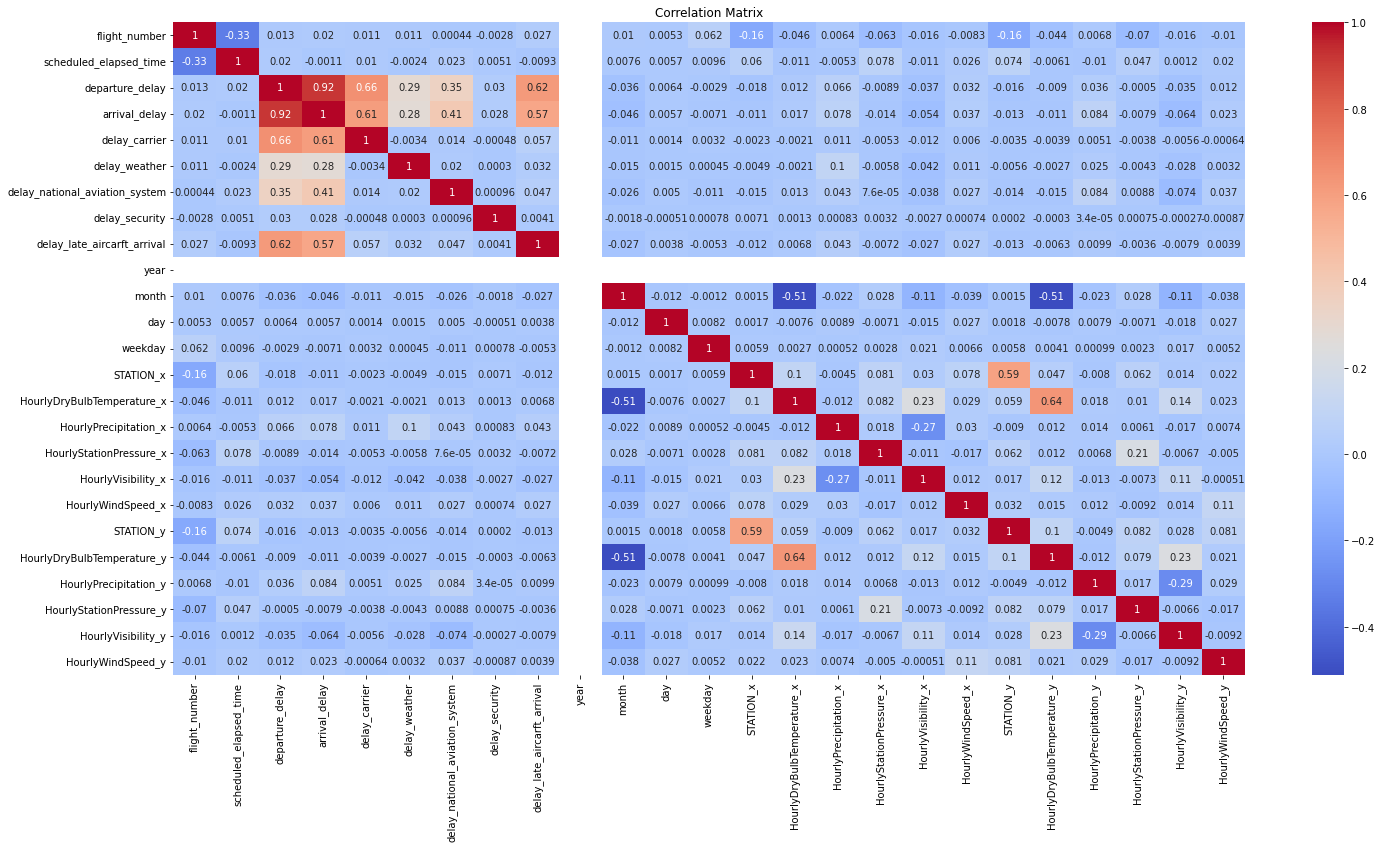

In [12]:
# Selecting numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(24,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()